# Gerekli Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
import re
import string
import os
import spacy
import folium
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from shapely.geometry import Point, Polygon
from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime
from wordcloud import WordCloud

import nltk
#nltk.download('popular')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(format = '%(asctime)s %(message)s',
                    datefmt = '%m/%d/%Y %I:%M:%S %p',
                    filename = 'logs/3_eda.log',
                    level=logging.DEBUG)

PROJECT_ROOT_DIR = "./images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "eda")
np.random.seed(42)

def save_fig(title):
    path = os.path.join(IMAGES_PATH, title + ".png")
    plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

import warnings
warnings.filterwarnings('ignore')

2023-12-30 16:12:55.315432: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-30 16:12:55.319038: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 16:12:55.362287: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 16:12:55.362338: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 16:12:55.364361: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# Veriyi yükleyelim.

In [2]:
df_ = pd.read_csv('data/cleaned.csv', index_col=0)
logging.debug('Temizlenmiş veri seti yüklendi.')
df = df_.copy()
df.head()

,Dizi Linki,Dizi Adı,Tür,Uyarlama,Senarist,Yönetmen,Başrol,Besteci,Sezon sayısı,Bölüm sayısı,Yapımcı,Mekân,Görüntü yönetmeni,Gösterim süresi,Yapım şirketi,Kanal,Platform,Ses formatı,Yayın tarihi,Tarih,Youtube,Facebook,Twitter,Instagram,Durumu
0,https://tr.wikipedia.org//wiki/Kaynanalar,Kaynanalar,Komedi,?,?,"Tekin Akmansoy,Arzu Akmansoy","Tekin Akmansoy,Leman Çıdamlı,Defne Yalnız,Sevda Aydan,Ege Aydan,Münir Caner,Sermin Hürmeriç,Sezai Aydın",?,14,314,?,?,?,?,?,"TRT 1,Kanal D",?,?,19 Mayıs 1974 - 24 Ocak 2005,1974,0,0,0,0,Sona erdi
1,"https://tr.wikipedia.org//wiki/A%C5%9Fk-%C4%B1_Memnu_(dizi,_1975)",Aşk-ı Memnu,"Aile,Dram",?,Halit Refiğ,Halit Refiğ,"Suna Keskin,Müjde Ar,Şükran Güngör,Neriman Köksal,Itır Esen",?,1,6,?,İstanbul,?,?,?,TRT 1,?,?,19 Nisan 1975 - 24 Mayıs 1975,1975,0,0,0,0,Sona erdi
2,?,Kartallar Yüksek Uçar,Polisiye,?,Atilla İlhan,Hüseyin Karakaş,"Selda Alkor,Hüseyin Peyda,Serap Aksoy,Necmettin Çobanoğlu,Can Gürzap",?,1,3,?,?,?,?,?,?,?,?,26 Kasım 1983,1983,0,0,0,0,Yayından kaldırıldı
3,https://tr.wikipedia.org//wiki/%C3%9C%C3%A7_%C4%B0stanbul_(dizi),Üç İstanbul,Dram,?,Bülent Oran,Feyzi Tuna,"Ayda Aksel,Gülsen Tuncer,Celile Toyon,Burçin Oraloğlu,Nilgün Akçaoğlu",Timur Selçuk,1,?,Oskay Alptürk,?,Muzaffer Turan,?,Ercan Film,TRT 1,?,?,1983,1983,0,0,0,0,Sona erdi
4,"https://tr.wikipedia.org//wiki/K%C3%BC%C3%A7%C3%BCk_A%C4%9Fa_(dizi,_1984)",Küçük Ağa,"Dram,Aksiyon,Tarihî",?,Tarık Buğra,Yücel Çakmaklı,"Çetin Tekindor,Aydan Şener,Erol Taş,Fikret Hakan",?,1,8,İlksen Bektaş,?,Sineray,58,TRT,TRT 1,?,?,"25 Mart 1984,(,1984-03-25,),[1],-,13 Mayıs 1984,(,1984-05-13,),[2]",1984,0,0,0,0,Sona erdi


# En'leri bulalım.

In [3]:
def top_100_finder(df, col_name):
    text_arr = []

    for i in range(len(df)):
        text = df.loc[i, col_name]
        #text = remove_parentheses(text)
        texts = text.split(',')
        for t in texts:
            if t not in stopwords.words('turkish') and len(t) > 0 and t != '?':
                text_arr.append(t.strip())
                
    return text_arr

In [4]:
turler = top_100_finder(df, 'Tür')
logging.debug('Veri setindeki türler ve adetleri bulundu.')
Counter(turler)

Counter({'Dram': 816,
         'Komedi': 462,
         'Aile': 249,
         'Aksiyon': 181,
         'Romantik': 139,
         'Polisiye': 104,
         'Aşk': 88,
         'Tarihî': 79,
         'Gençlik': 75,
         'Bilim Kurgu': 46,
         'Gerilim': 44,
         'Gizem': 1})

In [5]:
def plot_top_15(df, x_title):
    arr = top_100_finder(df, x_title)
    sorted_arr = dict(sorted(Counter(arr).items(), key=lambda item: item[1], reverse=True)[:15])
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=list(sorted_arr.keys()), y=list(sorted_arr.values()), palette='viridis')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.title(f'Top 15 - {x_title}')
    plt.xlabel(x_title)
    plt.ylabel('Count')
    plt.tight_layout()
    save_fig(f'top_15_{x_title}')
    plt.show()

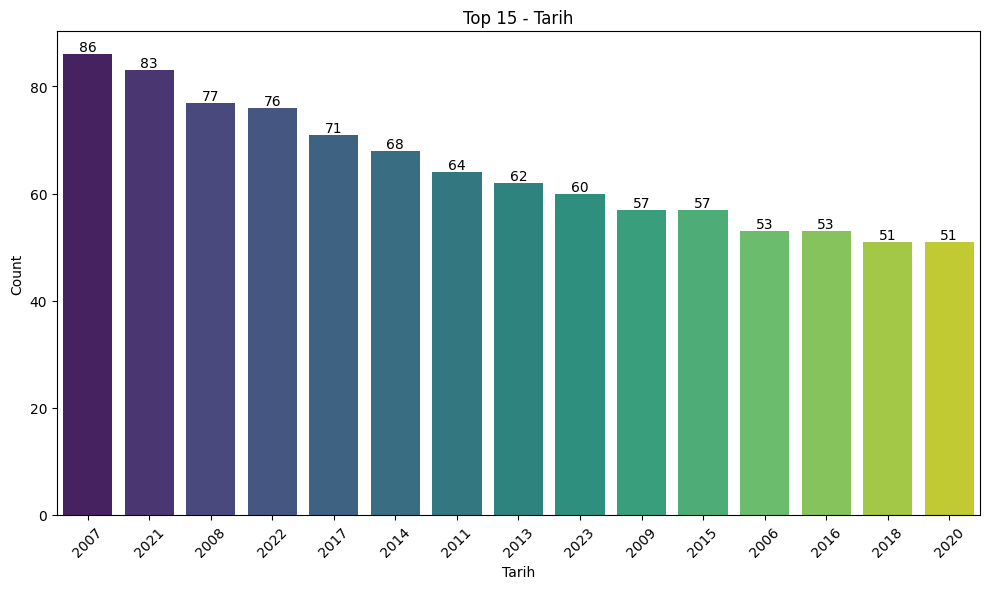

In [6]:
logging.debug('En çok geçen 15 tarih grafiği oluşturuldu.')
plot_top_15(df, 'Tarih')

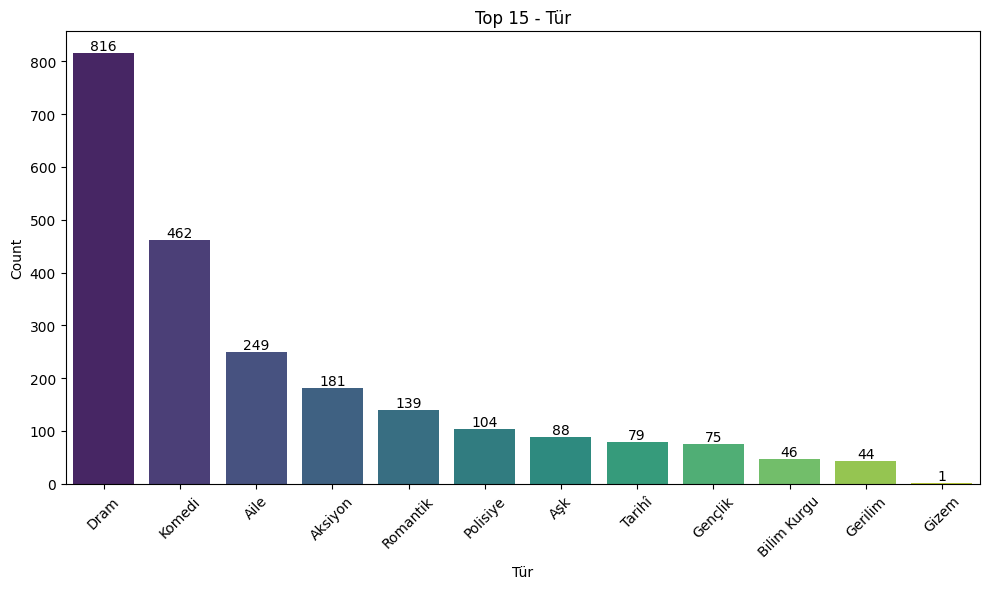

In [7]:
logging.debug('En çok geçen 15 tür grafiği oluşturuldu.')
plot_top_15(df, 'Tür')

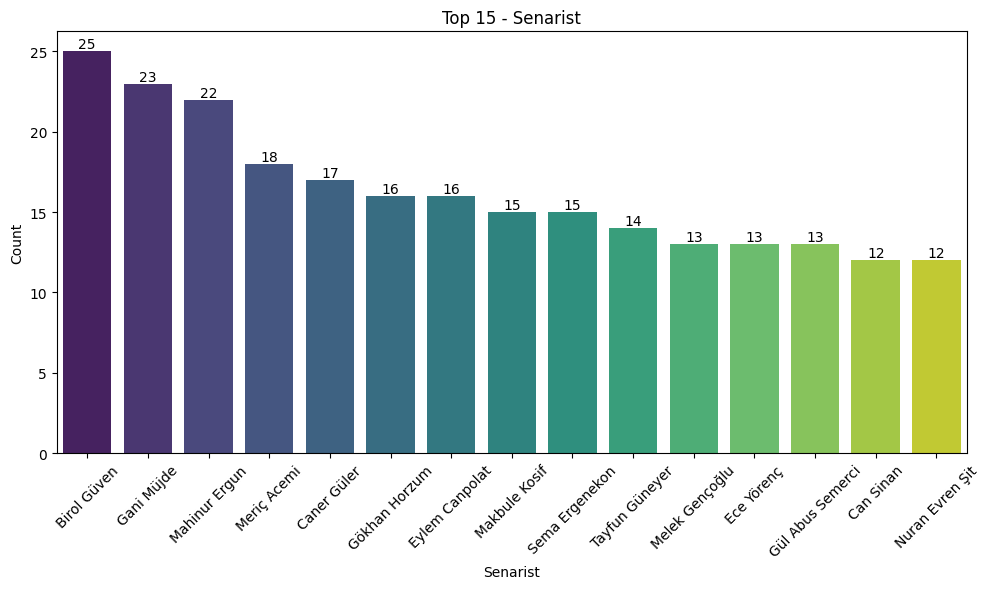

In [8]:
logging.debug('En çok geçen 15 senarist grafiği oluşturuldu.')
plot_top_15(df, 'Senarist')

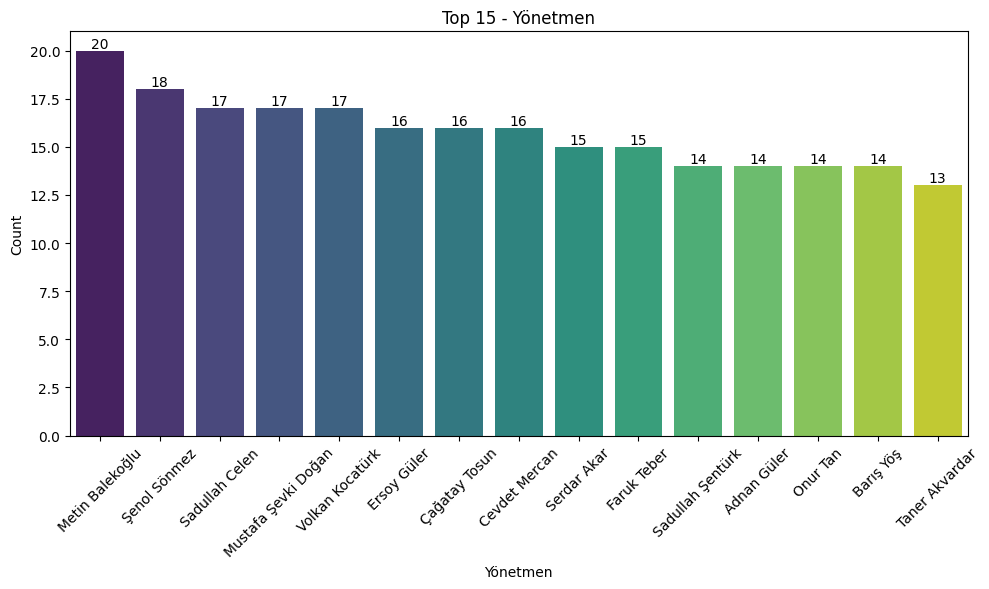

In [9]:
logging.debug('En çok geçen 15 yönetmen grafiği oluşturuldu.')
plot_top_15(df, 'Yönetmen')

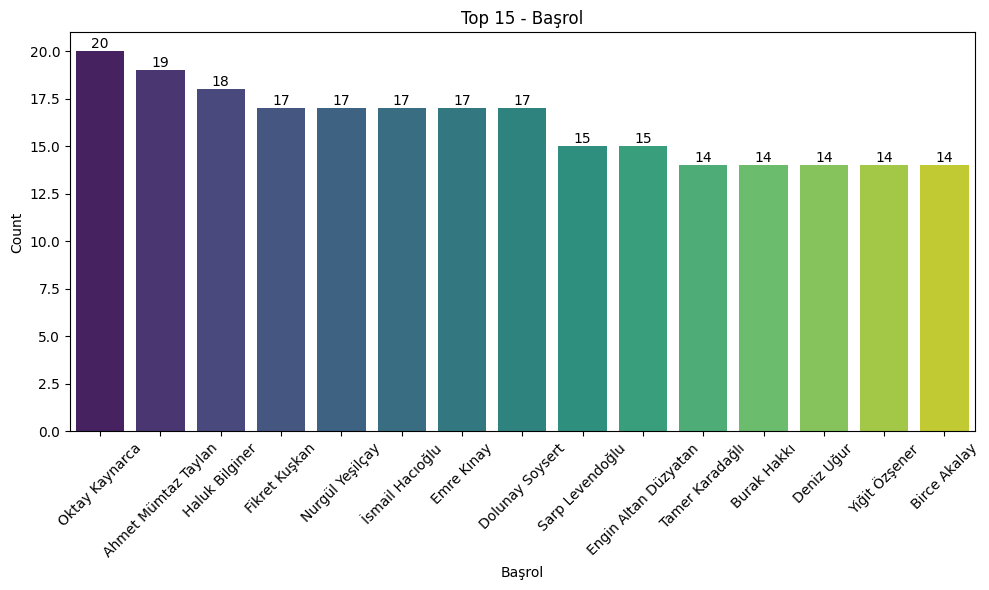

In [10]:
logging.debug('En çok geçen 15 başrol grafiği oluşturuldu.')
plot_top_15(df, 'Başrol')

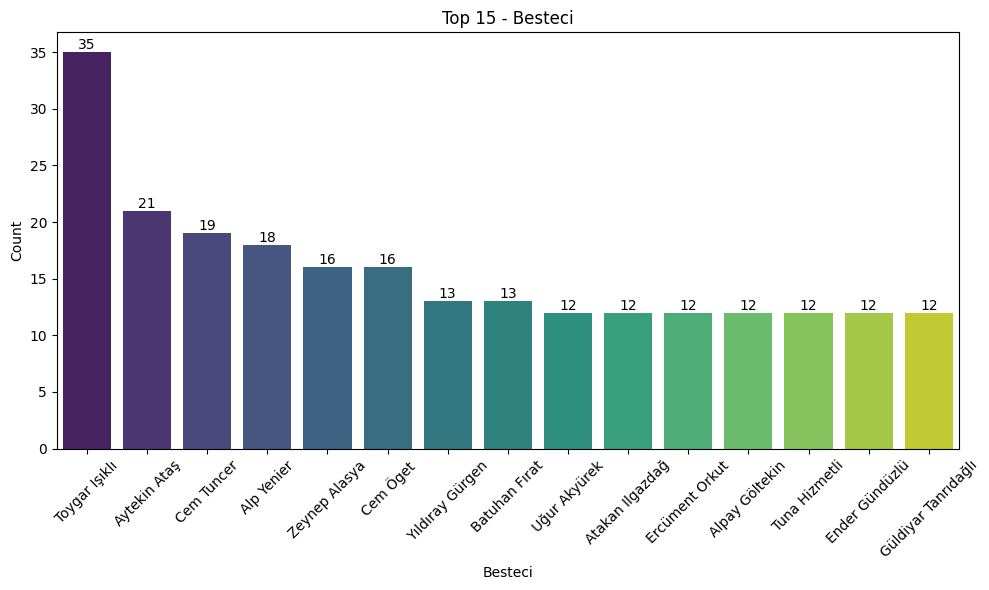

In [11]:
logging.debug('En çok geçen 15 besteci grafiği oluşturuldu.')
plot_top_15(df, 'Besteci')

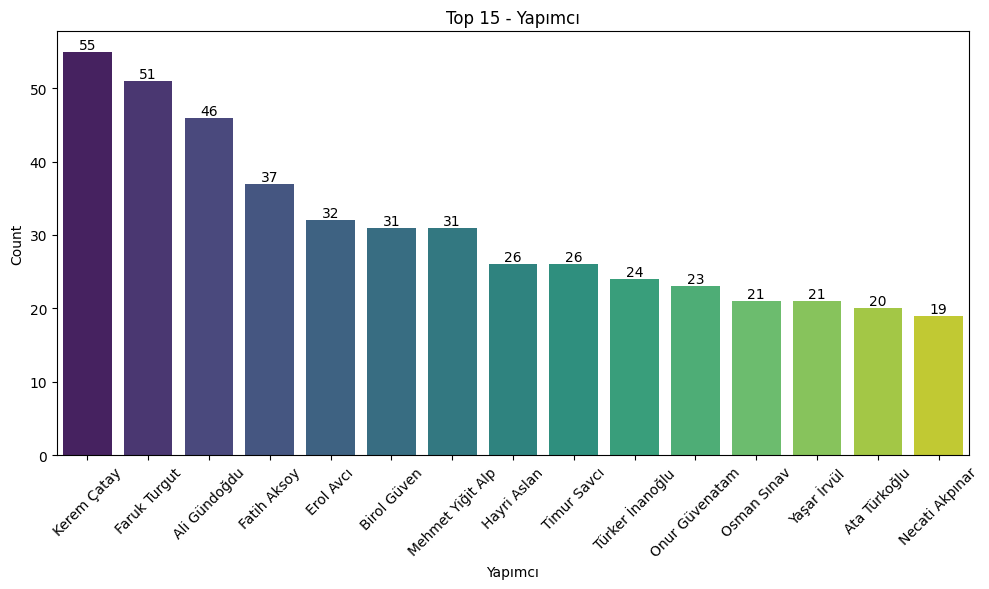

In [12]:
logging.debug('En çok geçen 15 yapımcı grafiği oluşturuldu.')
plot_top_15(df, 'Yapımcı')

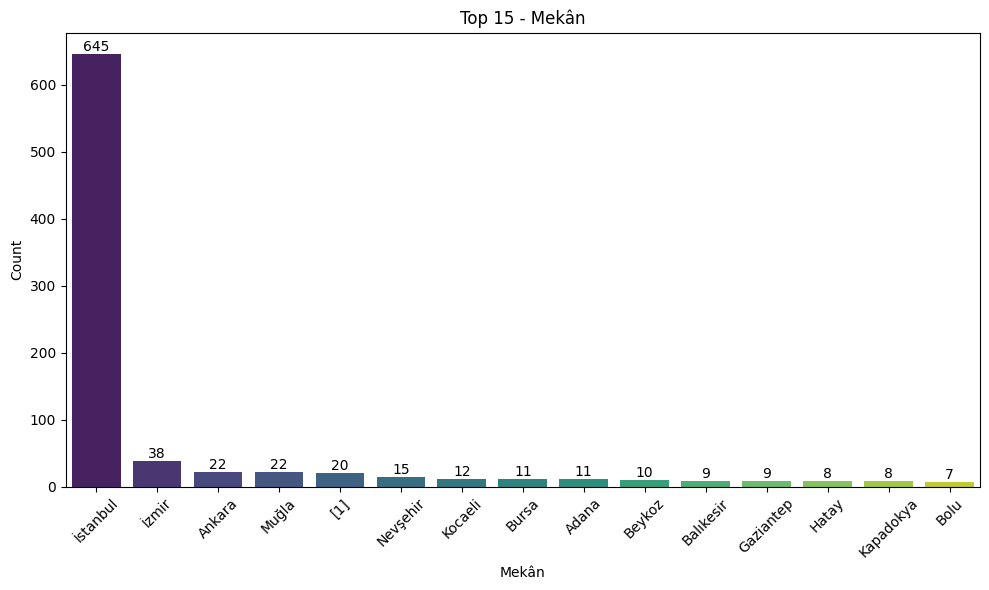

In [13]:
logging.debug('En çok geçen 15 mekan grafiği oluşturuldu.')
plot_top_15(df, 'Mekân')

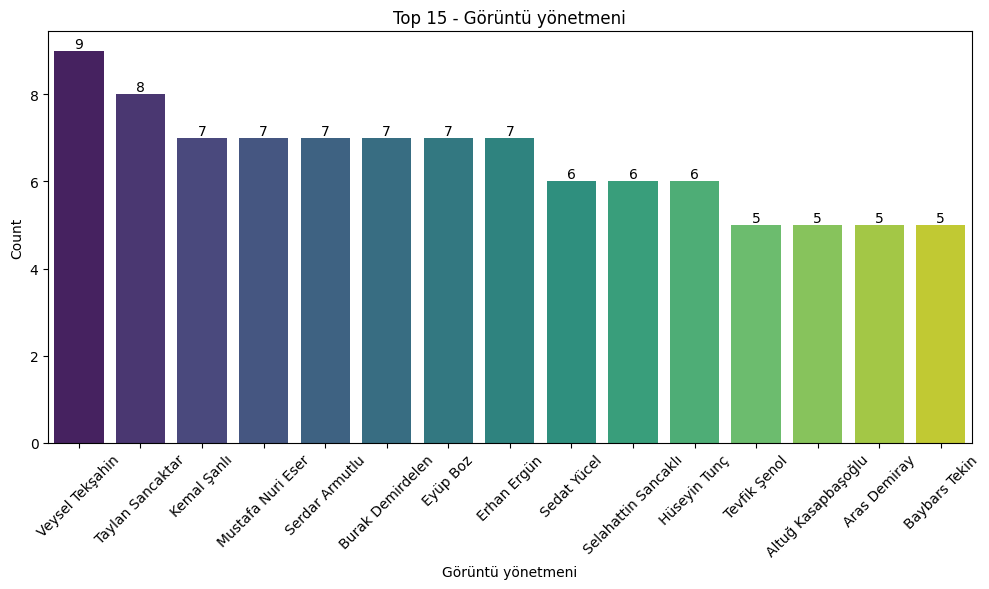

In [14]:
logging.debug('En çok geçen 15 görüntü yönetmeni grafiği oluşturuldu.')
plot_top_15(df, 'Görüntü yönetmeni')

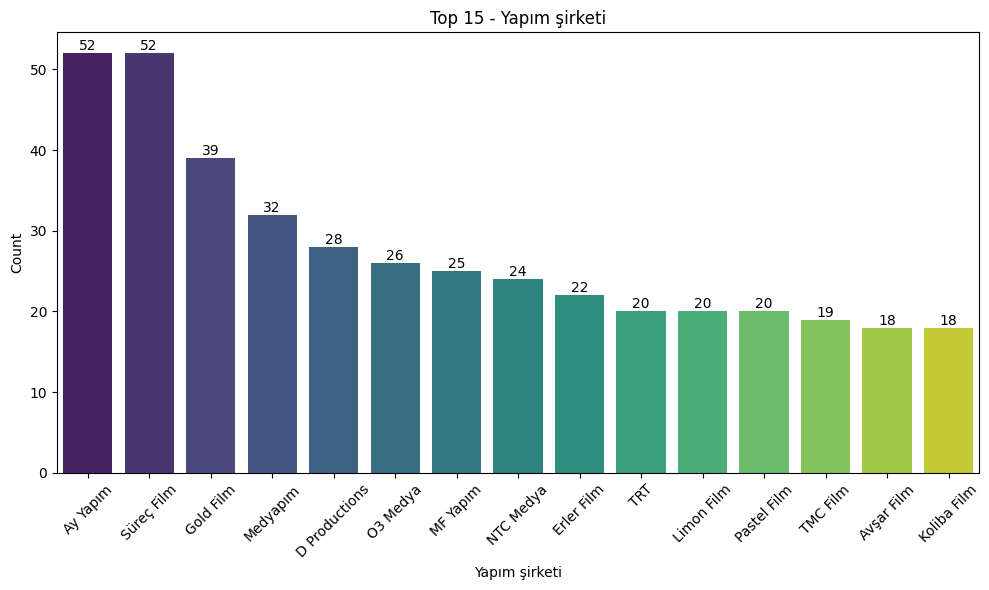

In [15]:
logging.debug('En çok geçen 15 yapım şirketi grafiği oluşturuldu.')
plot_top_15(df, 'Yapım şirketi')

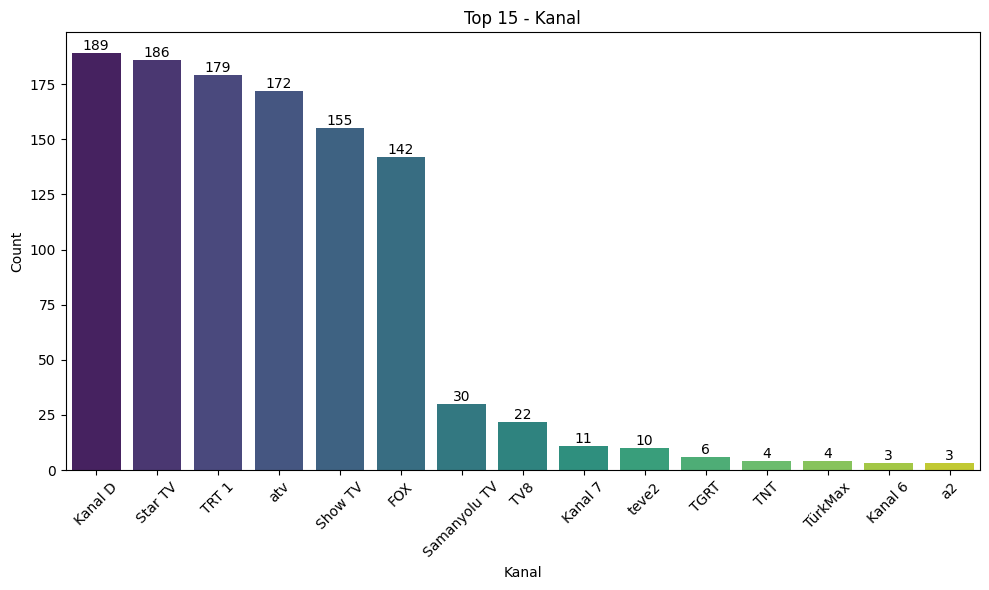

In [16]:
logging.debug('En çok geçen 15 kanal grafiği oluşturuldu.')
plot_top_15(df, 'Kanal')

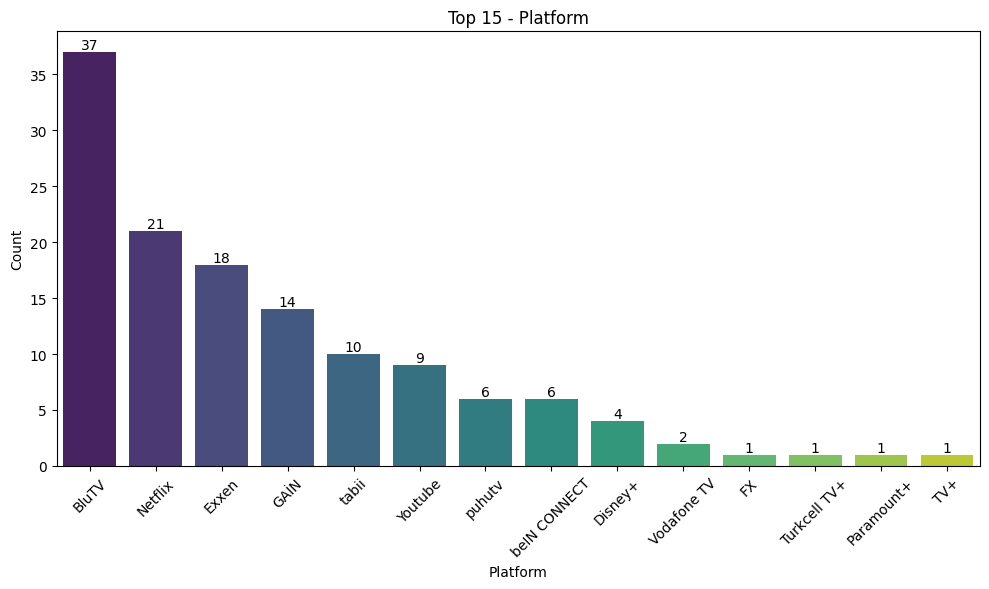

In [17]:
logging.debug('En çok geçen 15 platform grafiği oluşturuldu.')
plot_top_15(df, 'Platform')

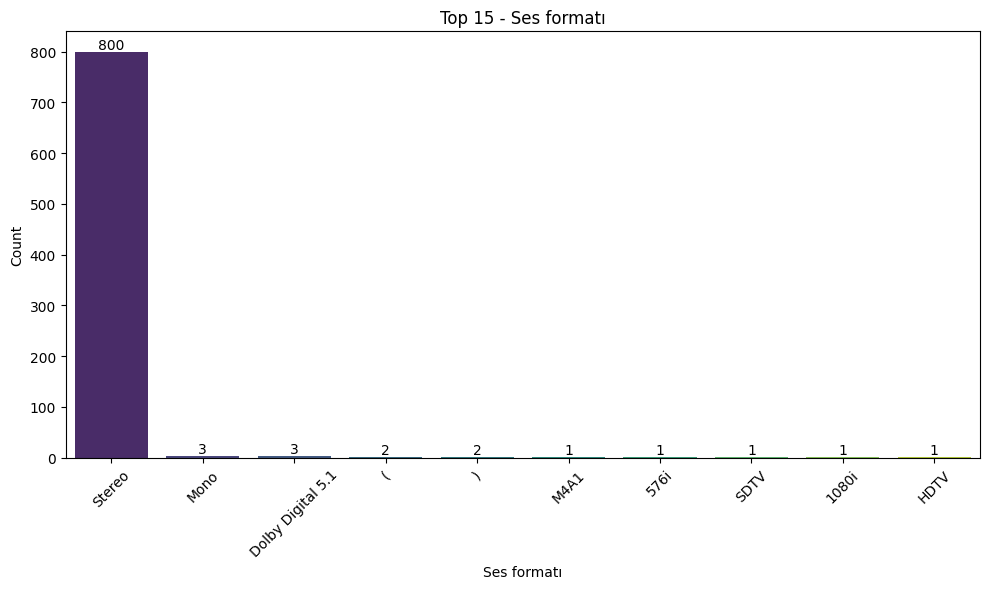

In [18]:
logging.debug('En çok geçen 15 ses formatı grafiği oluşturuldu.')
plot_top_15(df, 'Ses formatı')

In [19]:
def word_freq(data, text, title):
    freq_words = data[text].tolist()
    freq_words = [i.lower() for i in freq_words]
    freq_punc = []

    for o in freq_words:
        freq_punc += nltk.word_tokenize(o)

    freq_func = [o for o in freq_punc if o not in string.punctuation]
    freq_func = [o for o in freq_func if o not in set(stopwords.words('turkish'))]
    freq_freq = Counter(freq_func)

    freq_top = freq_freq.most_common(50)

    words = [word for word, _ in freq_top]
    counts = [count for _, count in freq_top]

    plt.figure(figsize=(20, 12))
    ax = sns.barplot(x=words, y=counts)
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    save_fig(title)
    return freq_top

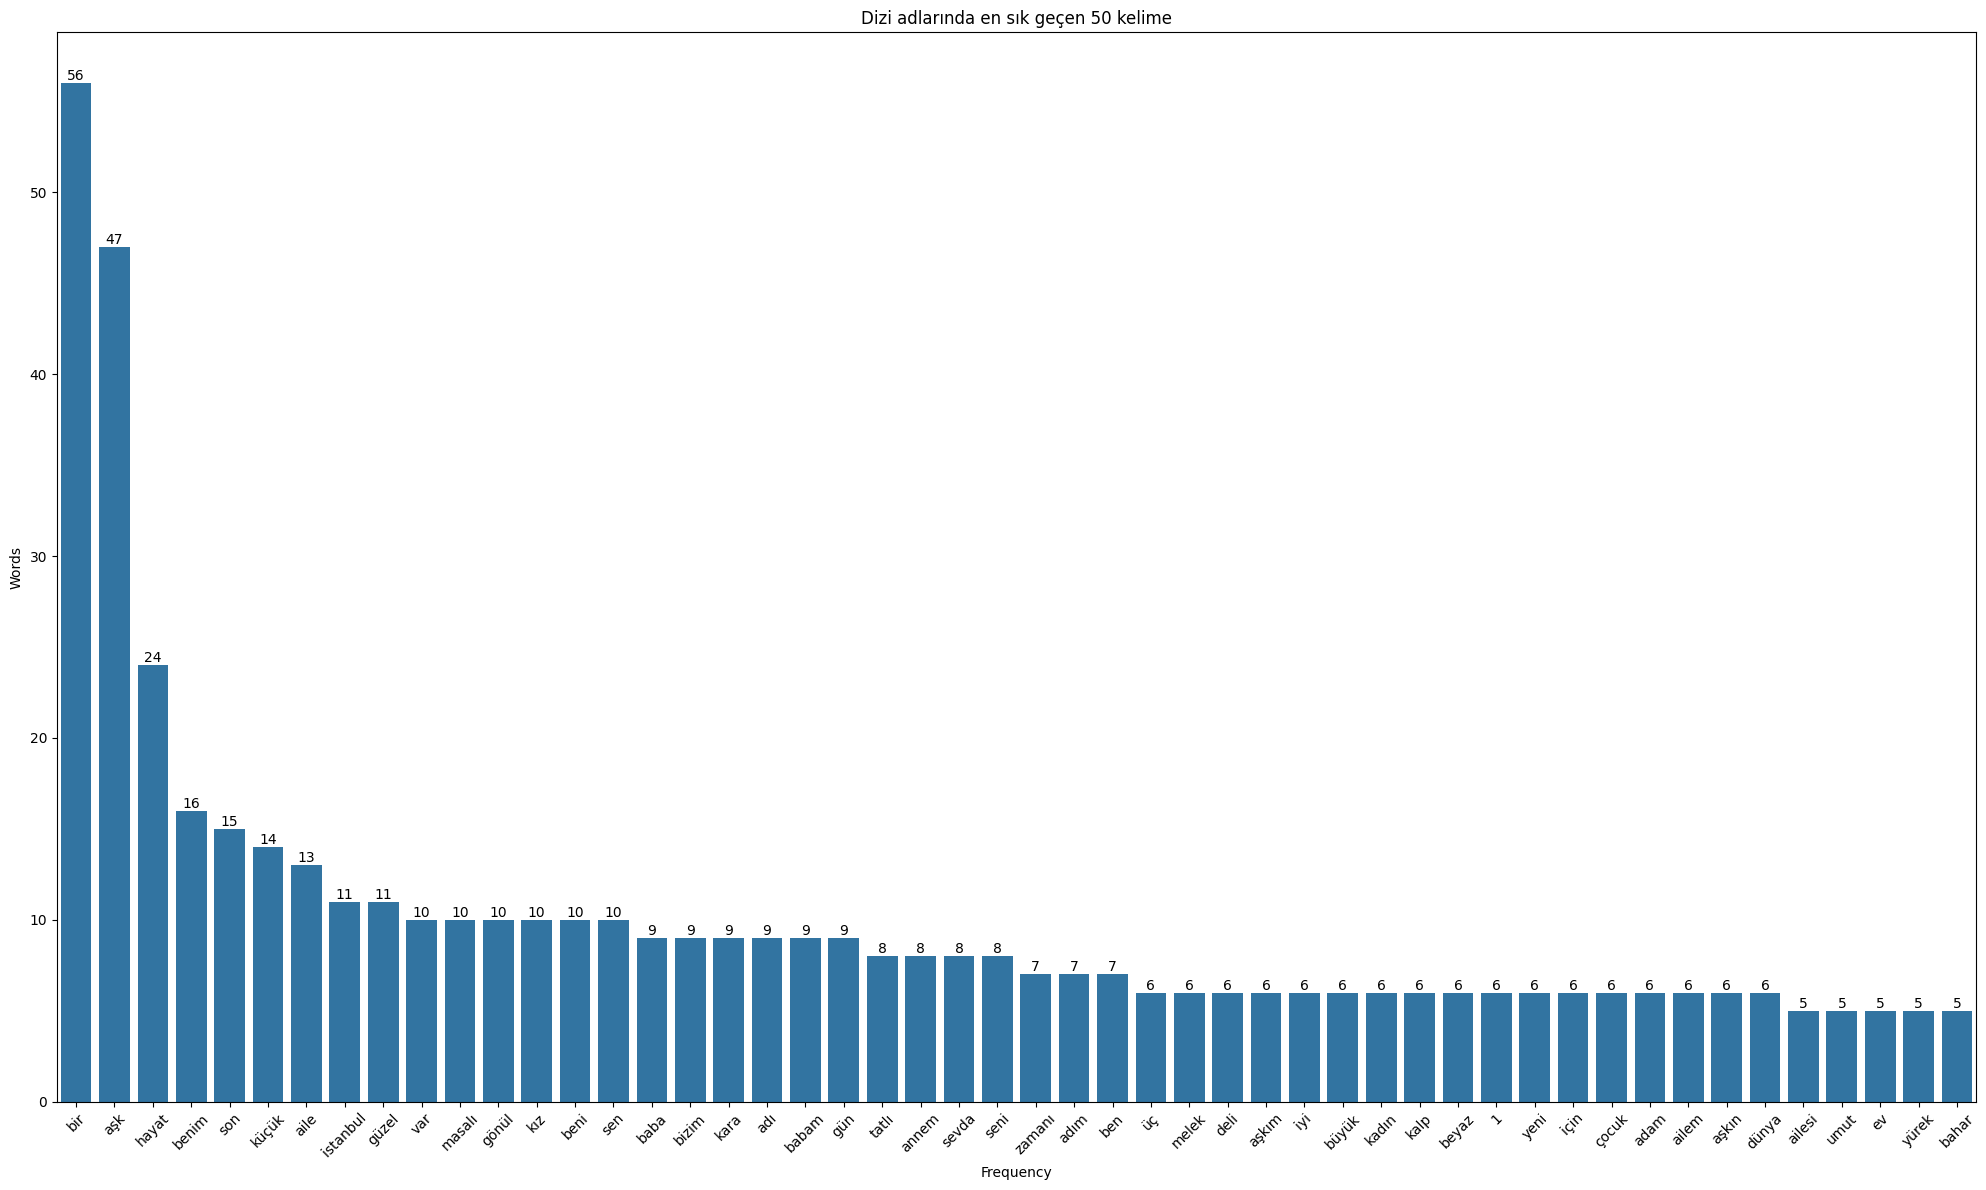

In [20]:
logging.debug('Dizi adında en çok geçen 50 tür grafiği oluşturuldu.')
top_dizi_ad = word_freq(df, 'Dizi Adı', 'Dizi adlarında en sık geçen 50 kelime')

In [21]:
def print_wordcloud(dict_top):
    dict_top = dict(dict_top)
    word_cloud = WordCloud(
        width=1200,
        height=700,
        background_color="black",
        min_font_size=5
    ).generate_from_frequencies(dict_top)
    
    plt.figure()
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    save_fig('wc')
    plt.show()

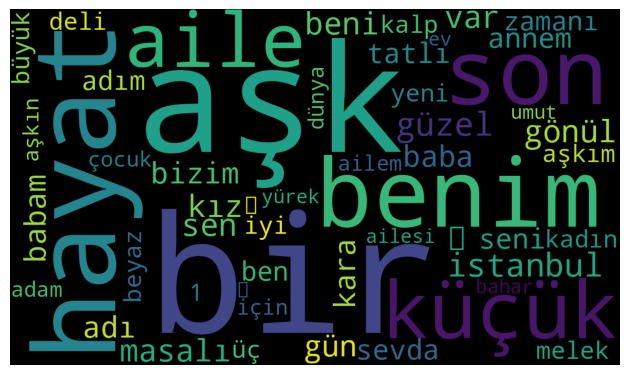

In [22]:
logging.debug('Dizi adında en çok geçen 50 tür kelime bulutu grafiği oluşturuldu.')
print_wordcloud(top_dizi_ad)

In [81]:
geo_df = pd.DataFrame(columns=['Yer', 'Enlem', 'Boylam'])
geolocator = Nominatim(user_agent="my_geocoder")
mekanlar = top_100_finder(df, 'Mekân')
mekan = [w for w in Counter(mekanlar).keys()]
geo_df['Yer'] = mekan
geo_df = geo_df[geo_df['Yer'] != ''].reset_index(drop=True)
geo_df = geo_df[geo_df['Yer'] != '?'].reset_index(drop=True)
logging.debug('Mekanların koordinatları veri seti oluşturuldu.')
geo_df.head()

,Yer,Enlem,Boylam
0,İstanbul,NaN,NaN
1,İzmir,NaN,NaN
2,İzmit,NaN,NaN
3,Kocaeli,NaN,NaN
4,Türkiye,NaN,NaN


In [30]:
logging.debug('Mekanların koordinatları veri seti oluşturuldu.')

In [82]:
geo_df.shape

(246, 3)

In [26]:
def find_lat_long(text):
    location = geolocator.geocode(text)
    if location != None:
        return location.latitude, location.longitude
    else:
        return np.nan, np.nan

In [ ]:
geo_df[['Enlem', 'Boylam']] = geo_df['Yer'].apply(lambda x: pd.Series(find_lat_long(x)))

In [ ]:
geo_df.dropna(inplace=True)

In [31]:
logging.debug('Mekanların koordinatları veri seti kaydedildi.')

In [ ]:
geo_df.to_csv('geo_df.csv')

In [27]:
geo_df = pd.read_csv('geo_df.csv', index_col=0)
geo_df.head()

,Yer,Enlem,Boylam
0,İstanbul,41.08,29.05
1,İzmir,38.42,27.14
2,İzmit,40.77,29.95
3,Kocaeli,40.77,29.94
4,Türkiye,38.96,34.92


In [28]:
geo_df.shape

(194, 3)

In [32]:
logging.debug('Mekanların konumları harita üzerinde gösterildi.')

In [29]:
m = folium.Map(location=[geo_df['Enlem'].mean(), geo_df['Boylam'].mean()], zoom_start=4)
for i, row in geo_df.iterrows():
    folium.Marker([row['Enlem'], row['Boylam']], popup=row['Yer']).add_to(m)

m

In [33]:
logging.debug('Mekanların koordinatları ısı haritası üzerinde gösterildi.')

In [30]:
m = folium.Map(location=[geo_df['Enlem'].mean(), geo_df['Boylam'].mean()], zoom_start = 13) 
heat_data = [[row['Enlem'],row['Boylam']] for index, row in geo_df.iterrows()]
HeatMap(heat_data).add_to(m)
m

In [34]:
channels = urlopen('https://tr.wikipedia.org/wiki/T%C3%BCrkiye%27de_yay%C4%B1n_yapan_televizyon_kanallar%C4%B1_listesi')
logging.debug('Türkiyedeki televizyon kanalları listesi wikipediadan çekildi.')
channels_content = BeautifulSoup(channels, 'html.parser')
tables = channels_content.find_all('table', {'class': 'wikitable'})

In [35]:
channel_adlar = []
channel_ucretler = []

In [36]:
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if len(cells) > 1:
            channel_ad = cells[0].text.strip('\n')
            channel_ucret = cells[5].text.strip('\n')
            if channel_ucret == '':
                channel_ucret = 'Ücretsiz'

            channel_adlar.append(channel_ad)
            channel_ucretler.append(channel_ucret)

In [37]:
logging.debug('Çekilen kanallar veri seti oluşturuldu.')
channel_df = pd.DataFrame({'Kanal Adı': channel_adlar, 'Fiyat': channel_ucretler})
channel_df.head()

,Kanal Adı,Fiyat
0,24 HD,Ücretsiz
1,24,Ücretsiz
2,24Kitchen HD,Ücretsiz
3,360 HD,Ücretsiz
4,360,Ücretsiz


In [35]:
channel_df.shape

(386, 2)

In [38]:
logging.debug('Kanallar veri seti kaydedildi.')
channel_df.to_csv('data/channels.csv')

In [39]:
channel_df = pd.read_csv('data/channels.csv', index_col=0)
channel_df.head()

,Kanal Adı,Fiyat
0,24 HD,Ücretsiz
1,24,Ücretsiz
2,24Kitchen HD,Ücretsiz
3,360 HD,Ücretsiz
4,360,Ücretsiz


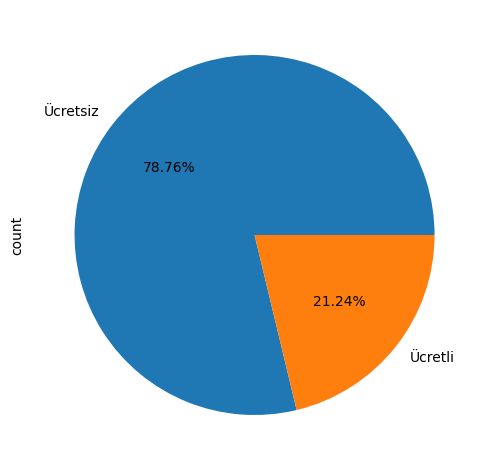

In [40]:
logging.debug('Yayın yapanların ücretli/ücretsiz oranını gösteren grafik oluşturuldu.')
channel_df['Fiyat'].value_counts().plot(kind='pie', autopct='%.2f%%')
save_fig('kanal_fiyat')

# Türk Dizilerindeki Kadın ve Erkek Oyuncuların Oranı

In [41]:
def get_html(link):
    html = urlopen(link)
    soup = BeautifulSoup(html, 'html.parser')
    return soup

In [42]:
wiki_root_link = 'https://tr.wikipedia.org/'

In [43]:
url_turk_dizi_oyunculari_kadin = [
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_kad%C4%B1n_dizi_oyuncular%C4%B1&pageuntil=B%C3%BC%C5%9Fra+Develi#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_kad%C4%B1n_dizi_oyuncular%C4%B1&pagefrom=B%C3%BC%C5%9Fra+Develi#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_kad%C4%B1n_dizi_oyuncular%C4%B1&pagefrom=Fato%C5%9F+Sezer#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_kad%C4%B1n_dizi_oyuncular%C4%B1&pagefrom=Meltem+%C3%96ren#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_kad%C4%B1n_dizi_oyuncular%C4%B1&pagefrom=Selen+U%C3%A7er#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_kad%C4%B1n_dizi_oyuncular%C4%B1&pagefrom=Zeynep+Tu%C4%9F%C3%A7e+Bayat#mw-pages'
]

In [44]:
url_turk_dizi_oyunculari_erkek = [
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_erkek_dizi_oyuncular%C4%B1&pageuntil=B%C3%BClent+Kayaba%C5%9F#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_erkek_dizi_oyuncular%C4%B1&pagefrom=B%C3%BClent+Kayaba%C5%9F#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_erkek_dizi_oyuncular%C4%B1&pagefrom=Erkan+Avc%C4%B1#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_erkek_dizi_oyuncular%C4%B1&pagefrom=Kaan+Sekban#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_erkek_dizi_oyuncular%C4%B1&pagefrom=M%C3%BCcap+Ofluo%C4%9Flu#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_erkek_dizi_oyuncular%C4%B1&pagefrom=Serhat+%C3%96zcan#mw-pages',
    'https://tr.wikipedia.org/w/index.php?title=Kategori:T%C3%BCrk_erkek_dizi_oyuncular%C4%B1&pagefrom=Y%C4%B1lmaz+K%C3%B6ksal#mw-pages'
]

In [45]:
turk_kadin_oyuncular = []
turk_erkek_oyuncular = []
turk_kadin_oyuncular_link = []
turk_erkek_oyuncular_link = []

In [46]:
for url in url_turk_dizi_oyunculari_kadin:
    content = get_html(url)
    main_div = content.find('div', {'id': 'mw-pages'})
    rows = main_div.find_all('li')
    for row in rows:
        oyuncu_link = wiki_root_link + row.find('a').get('href') if row.find('a') else "?"
        turk_kadin_oyuncular_link.append(oyuncu_link)
        turk_kadin_oyuncular.append(row.get_text())

In [48]:
logging.debug('Türk kadın dizi oyuncuları listesi wikipediaden çekildi.')

In [47]:
for url in url_turk_dizi_oyunculari_erkek:
    content = get_html(url)
    main_div = content.find('div', {'id': 'mw-pages'})
    rows = main_div.find_all('li')
    for row in rows:
        oyuncu_link = wiki_root_link + row.find('a').get('href') if row.find('a') else "?"
        turk_erkek_oyuncular_link.append(oyuncu_link)
        turk_erkek_oyuncular.append(row.get_text())

In [49]:
logging.debug('Türk erkek dizi oyuncuları listesi wikipediaden çekildi.')

In [50]:
df_kadin_oyuncular = pd.DataFrame({'Oyuncu Linki': turk_kadin_oyuncular_link, 'Oyuncu Adı': turk_kadin_oyuncular, 'Cinsiyet': 'Kadın'})
df_erkek_oyuncular = pd.DataFrame({'Oyuncu Linki': turk_erkek_oyuncular_link, 'Oyuncu Adı': turk_erkek_oyuncular, 'Cinsiyet': 'Erkek'})
df_oyuncular = pd.concat([df_kadin_oyuncular, df_erkek_oyuncular], axis=0)
df_oyuncular = df_oyuncular.reset_index(drop=True)
logging.debug('Türk dizi oyuncuları veri seti oluşturuldu.')
df_oyuncular.head()

,Oyuncu Linki,Oyuncu Adı,Cinsiyet
0,https://tr.wikipedia.org//wiki/A%C3%A7elya_Akkoyun,Açelya Akkoyun,Kadın
1,https://tr.wikipedia.org//wiki/A%C3%A7elya_Devrim_Y%C4%B1lhan,Açelya Devrim Yılhan,Kadın
2,https://tr.wikipedia.org//wiki/A%C3%A7elya_Elmas,Açelya Elmas,Kadın
3,https://tr.wikipedia.org//wiki/A%C3%A7elya_%C3%96zcan,Açelya Özcan,Kadın
4,https://tr.wikipedia.org//wiki/A%C3%A7elya_Topalo%C4%9Flu,Açelya Topaloğlu,Kadın


In [51]:
df_oyuncular.shape

(2235, 3)

In [53]:
logging.debug('Türk dizi oyuncuları veri seti kaydedildi.')
df_oyuncular.to_csv('data/turk_dizi_oyunculari.csv')

In [54]:
df_oyuncular = pd.read_csv('data/turk_dizi_oyunculari.csv', index_col=0)
df_oyuncular.head()

,Oyuncu Linki,Oyuncu Adı,Cinsiyet
0,https://tr.wikipedia.org//wiki/A%C3%A7elya_Akkoyun,Açelya Akkoyun,Kadın
1,https://tr.wikipedia.org//wiki/A%C3%A7elya_Devrim_Y%C4%B1lhan,Açelya Devrim Yılhan,Kadın
2,https://tr.wikipedia.org//wiki/A%C3%A7elya_Elmas,Açelya Elmas,Kadın
3,https://tr.wikipedia.org//wiki/A%C3%A7elya_%C3%96zcan,Açelya Özcan,Kadın
4,https://tr.wikipedia.org//wiki/A%C3%A7elya_Topalo%C4%9Flu,Açelya Topaloğlu,Kadın


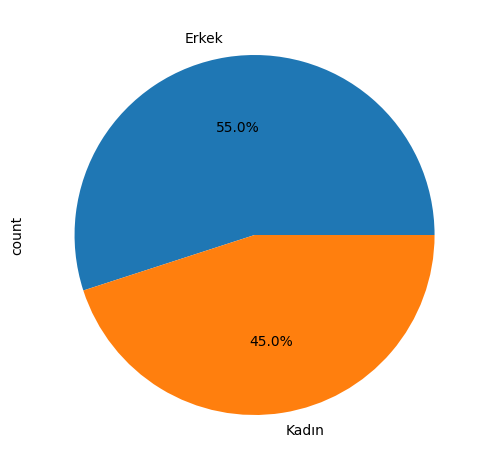

In [55]:
df_oyuncular['Cinsiyet'].value_counts().plot(kind='pie', autopct='%.1f%%')
save_fig('dizi_kadin_erkek_oyuncu_oranı')

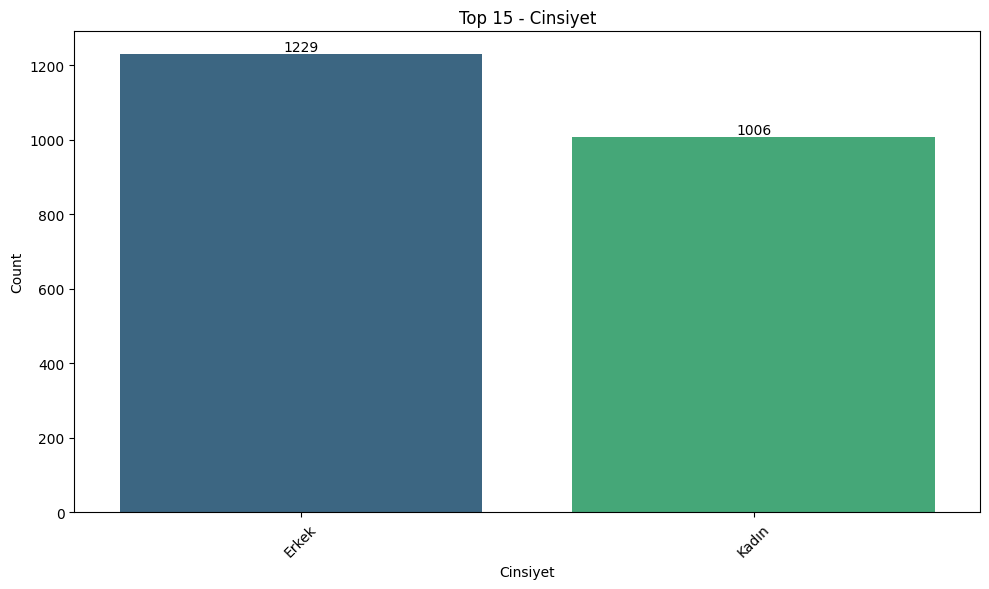

In [56]:
logging.debug('Türk kadın-erkek dizi oyuncuları oranı grafiği oluşturuldu.')
plot_top_15(df_oyuncular, 'Cinsiyet')

# Altın Kelebek Ödüllü Diziler

In [57]:
pantene = urlopen('https://tr.wikipedia.org/wiki/En_%C4%B0yi_Dizi_Alt%C4%B1n_Kelebek_%C3%96d%C3%BCl%C3%BC')
pantene_content = BeautifulSoup(pantene, 'html.parser')
logging.debug('Altın kelebek ödüllü diziler listesi wikipediaden çekildi.')
tables = pantene_content.find_all('table', {'class': 'wikitable'})

In [58]:
odul_yillar = []
odul_diziler = []
odul_kanallar = []
odul_yapimcilar = []

In [59]:
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        try:
            odul_yil = row.find('th').get_text().strip('\n')
            if odul_yil != 'Yıl':
                odul_yillar.append(odul_yil)
            cells = row.find_all('td')
            if len(cells) > 1:
                odul_dizi = cells[0].text.strip('\n')
                odul_kanal = cells[1].text.strip('\n')
                odul_yapimci = cells[2].text.strip('\n')
    
                odul_diziler.append(odul_dizi)
                odul_kanallar.append(odul_kanal)
                odul_yapimcilar.append(odul_yapimci)
        except:
            pass

In [60]:
pantene = urlopen('https://tr.wikipedia.org/wiki/En_%C4%B0yi_Komedi_Dizisi_Alt%C4%B1n_Kelebek_%C3%96d%C3%BCl%C3%BC')
pantene_content = BeautifulSoup(pantene, 'html.parser')
tables = pantene_content.find_all('table', {'class': 'wikitable'})

In [61]:
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        try:
            odul_yil = row.find('th').get_text().strip('\n')
            if odul_yil != 'Yıl':
                odul_yillar.append(odul_yil)
            cells = row.find_all('td')
            if len(cells) > 1:
                odul_dizi = cells[0].text.strip('\n')
                odul_kanal = '?'
                odul_yapimci = cells[1].text.strip('\n')
    
                odul_diziler.append(odul_dizi)
                odul_kanallar.append(odul_kanal)
                odul_yapimcilar.append(odul_yapimci)
        except:
            pass

In [62]:
pantene_dizi_df = pd.DataFrame({'Yıl': odul_yillar, 'Dizi': odul_diziler, 'Kanal': odul_kanallar, 'Yapımcı': odul_yapimcilar})
logging.debug('Altın kelebek ödüllü diziler tablosu oluşturuldu.')
pantene_dizi_df.head()

,Yıl,Dizi,Kanal,Yapımcı
0,1992 (20.),Yıldızlar Gece Büyür,TRT 1,Altuğ Savaşal
1,1993 (21.),Bizimkiler,TRT 1,Umur Bugay
2,1994 (22.),Bizimkiler,TRT 1,Umur Bugay
3,1995 (23.),Süper Baba,atv,Şevket Altuğ
4,1996 (24.),Çılgın Bediş,Kanal D,Ayhan Aybek


In [28]:
def remove_parentheses(text):
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r'\[[^]]*\]', '', text)
    text = re.sub('1. sezon', '', text)
    text = re.sub('2. sezon', '', text)
    text = re.sub(r',{2,}', ',', text)
    #text = re.sub(',', '', text)
    text = text.strip()
    return text

In [64]:
pantene_dizi_df['Yıl'] = pantene_dizi_df['Yıl'].apply(remove_parentheses)
logging.debug('Altın kelebek ödüllü diziler tablosu yıl sütunu temizlendi.')

In [65]:
pantene_dizi_df.head()

,Yıl,Dizi,Kanal,Yapımcı
0,1992,Yıldızlar Gece Büyür,TRT 1,Altuğ Savaşal
1,1993,Bizimkiler,TRT 1,Umur Bugay
2,1994,Bizimkiler,TRT 1,Umur Bugay
3,1995,Süper Baba,atv,Şevket Altuğ
4,1996,Çılgın Bediş,Kanal D,Ayhan Aybek


In [66]:
pantene_dizi_df.shape

(68, 4)

In [68]:
pantene_dizi_df = pantene_dizi_df.sort_values(by='Yıl').reset_index(drop=True)
logging.debug('Altın kelebek ödüllü diziler tablosu yıla göre sıralandı.')
pantene_dizi_df.head()

,Yıl,Dizi,Kanal,Yapımcı
0,1992,Yıldızlar Gece Büyür,TRT 1,Altuğ Savaşal
1,1992,Olacak O Kadar,?,Levent Kırca
2,1992,Bizimkiler,?,Umur Bugay
3,1993,Bizimkiler,TRT 1,Umur Bugay
4,1993,Olacak O Kadar,?,Levent Kırca


In [69]:
logging.debug('Altın kelebek ödüllü diziler tablosu kaydedildi.')
pantene_dizi_df.to_csv('data/pantene_odullu_diziler.csv')

In [70]:
pantene_dizi_df = pd.read_csv('data/pantene_odullu_diziler.csv', index_col=0)
pantene_dizi_df.head()

,Yıl,Dizi,Kanal,Yapımcı
0,1992,Yıldızlar Gece Büyür,TRT 1,Altuğ Savaşal
1,1992,Olacak O Kadar,?,Levent Kırca
2,1992,Bizimkiler,?,Umur Bugay
3,1993,Bizimkiler,TRT 1,Umur Bugay
4,1993,Olacak O Kadar,?,Levent Kırca


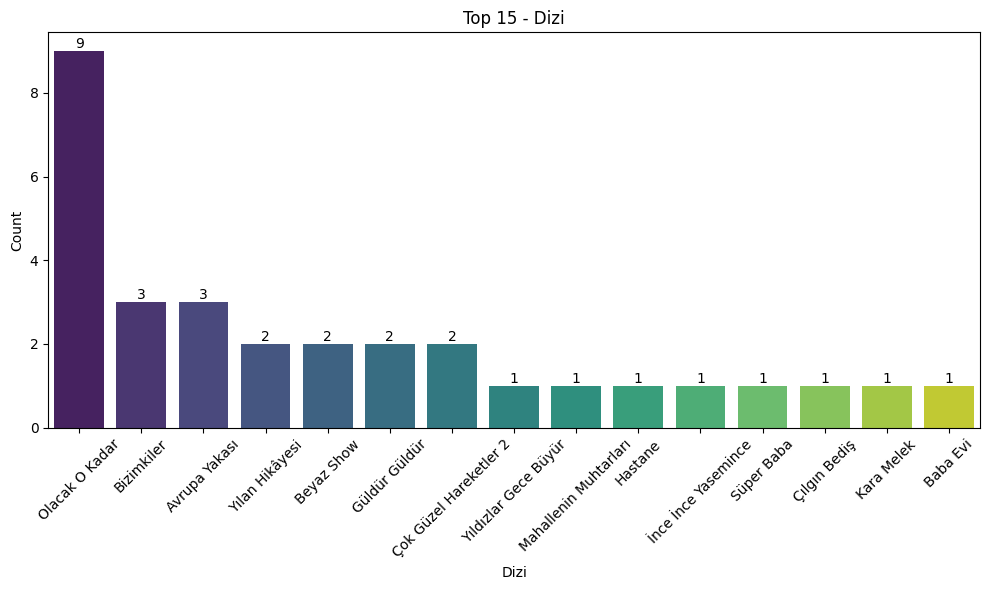

In [71]:
plot_top_15(pantene_dizi_df, 'Dizi')

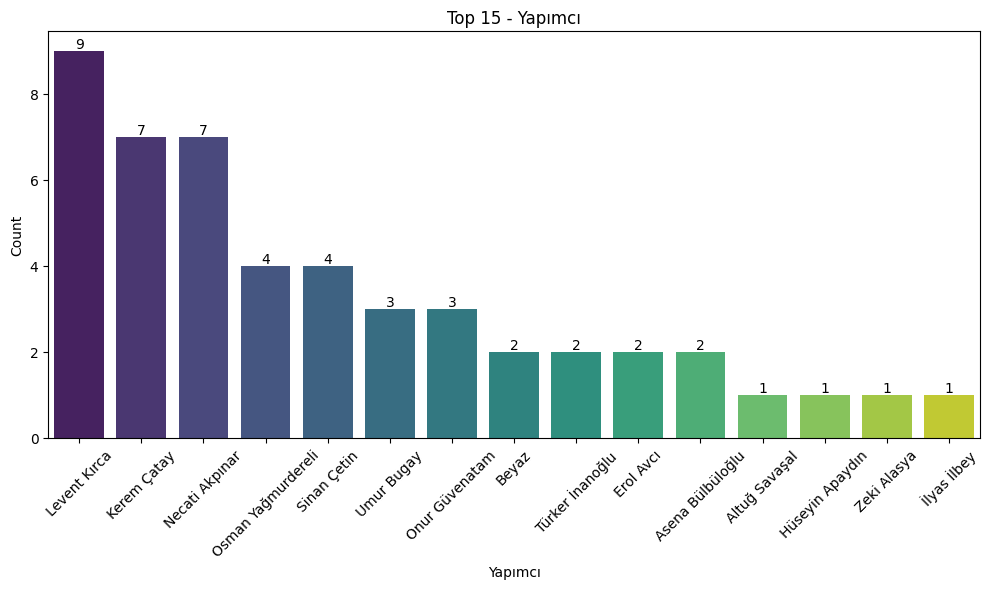

In [72]:
plot_top_15(pantene_dizi_df, 'Yapımcı')

# En Çok Altın Kelebek Ödülü Alan Oyuncular

In [73]:
pantene_oyuncu_urls = [
    'https://tr.wikipedia.org/wiki/En_%C4%B0yi_Erkek_Oyuncu_Alt%C4%B1n_Kelebek_%C3%96d%C3%BCl%C3%BC',
    'https://tr.wikipedia.org/wiki/En_%C4%B0yi_Kad%C4%B1n_Oyuncu_Alt%C4%B1n_Kelebek_%C3%96d%C3%BCl%C3%BC',
    'https://tr.wikipedia.org/wiki/En_%C4%B0yi_Kad%C4%B1n_Oyuncu_Alt%C4%B1n_Kelebek_%C3%96d%C3%BCl%C3%BC',
    'https://tr.wikipedia.org/wiki/En_%C4%B0yi_Kad%C4%B1n_Komedi_Oyuncusu_Alt%C4%B1n_Kelebek_%C3%96d%C3%BCl%C3%BC'
]

In [74]:
oyuncu_yillar = []
oyuncu_adlar = []
oyuncu_yapimlar = []

In [75]:
for url in pantene_oyuncu_urls:
    pantene = urlopen(url)
    pantene_content = BeautifulSoup(pantene, 'html.parser')
    tables = pantene_content.find_all('table', {'class': 'wikitable'})
    
    for table in tables:
        rows = table.find_all('tr')
        for row in rows:
            try:
                oyuncu_yil = row.find('th').get_text().strip('\n')
                if oyuncu_yil != 'Yıl':
                    oyuncu_yillar.append(odul_yil)
                cells = row.find_all('td')
                if len(cells) > 1:
                    oyuncu_ad = cells[0].text.strip('\n')
                    oyuncu_yapim = cells[1].text.strip('\n')
        
                    oyuncu_adlar.append(oyuncu_ad)
                    oyuncu_yapimlar.append(oyuncu_yapim)
            except:
                pass

In [76]:
logging.debug('Altın kelebek ödüllü oyuncular wikipediadan çekildi.')

In [104]:
pantene_oyuncu_df = pd.DataFrame({'Yıl': oyuncu_yillar, 'Oyuncu': oyuncu_adlar, 'Yapım': oyuncu_yapimlar})
logging.debug('Altın kelebek ödüllü oyuncular veri seti oluşturuldu.')
pantene_oyuncu_df.head()

,Yıl,Oyuncu,Yapım
0,1994 (22.),Erdal Özyağcılar,Bizimkiler
1,1994 (22.),Mehmet Aslantuğ,Yalancı
2,1994 (22.),Erdal Özyağcılar,Bizimkiler
3,1994 (22.),Şevket Altuğ,Süper Baba
4,1994 (22.),Şevket Altuğ,Süper Baba


In [105]:
pantene_oyuncu_df.dropna(inplace=True)

In [106]:
pantene_oyuncu_df['Yıl'] = pantene_oyuncu_df['Yıl'].apply(remove_parentheses)
logging.debug('Altın kelebek ödüllü oyuncular veri seti yıl sütunu temizlendi.')

In [107]:
pantene_oyuncu_df.head()

,Yıl,Oyuncu,Yapım
0,1994,Erdal Özyağcılar,Bizimkiler
1,1994,Mehmet Aslantuğ,Yalancı
2,1994,Erdal Özyağcılar,Bizimkiler
3,1994,Şevket Altuğ,Süper Baba
4,1994,Şevket Altuğ,Süper Baba


In [108]:
pantene_oyuncu_df = pantene_oyuncu_df.sort_values(by='Yıl').reset_index(drop=True)
logging.debug('Altın kelebek ödüllü oyuncular yıla göre sıralandı.')

In [112]:
pantene_oyuncu_df.dropna(inplace=True)

In [110]:
pantene_oyuncu_df.isnull().sum()

Yıl       0
Oyuncu    0
Yapım     0
dtype: int64

In [114]:
pantene_oyuncu_df.loc[3] = [1994, 'Yasemin Yalçın', 'Bilinmiyor']

In [115]:
logging.debug('Altın kelebek ödüllü oyuncular veri seti kaydedildi.')
pantene_oyuncu_df.to_csv('data/pantene_odullu_oyuncular.csv')

In [116]:
pantene_oyuncu_df = pd.read_csv('data/pantene_odullu_oyuncular.csv', index_col=0)
pantene_oyuncu_df.head()

,Yıl,Oyuncu,Yapım
0,1994,Erdal Özyağcılar,Bizimkiler
1,1994,Yasemin Yalçın,Haşlama Taşlama
2,1994,Yasemin Yalçın,Gülelim Eğlenelim
3,1994,Yasemin Yalçın,Bilinmiyor
4,1994,Pınar Deniz,Yargı


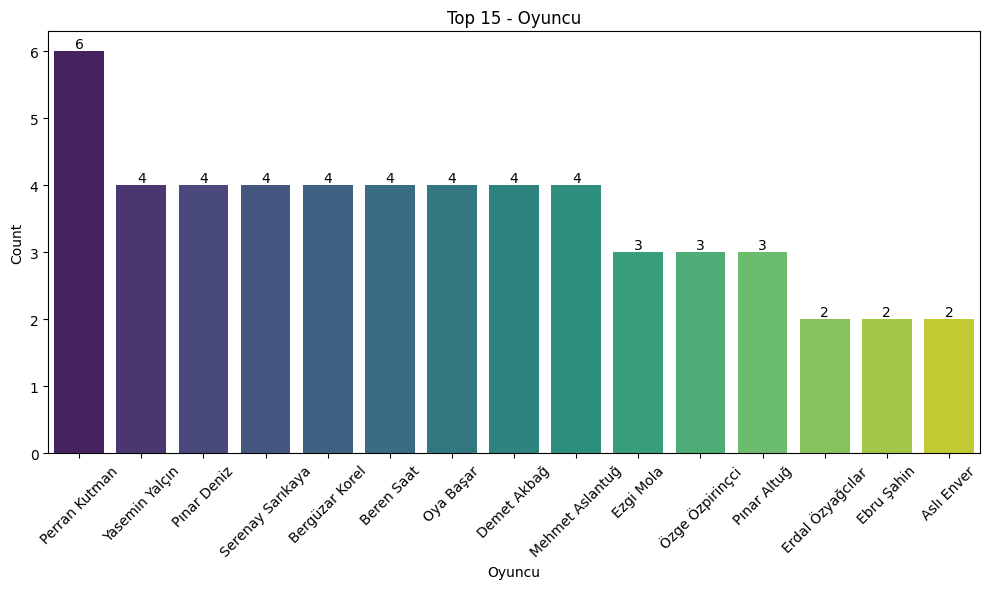

In [117]:
plot_top_15(pantene_oyuncu_df, 'Oyuncu')

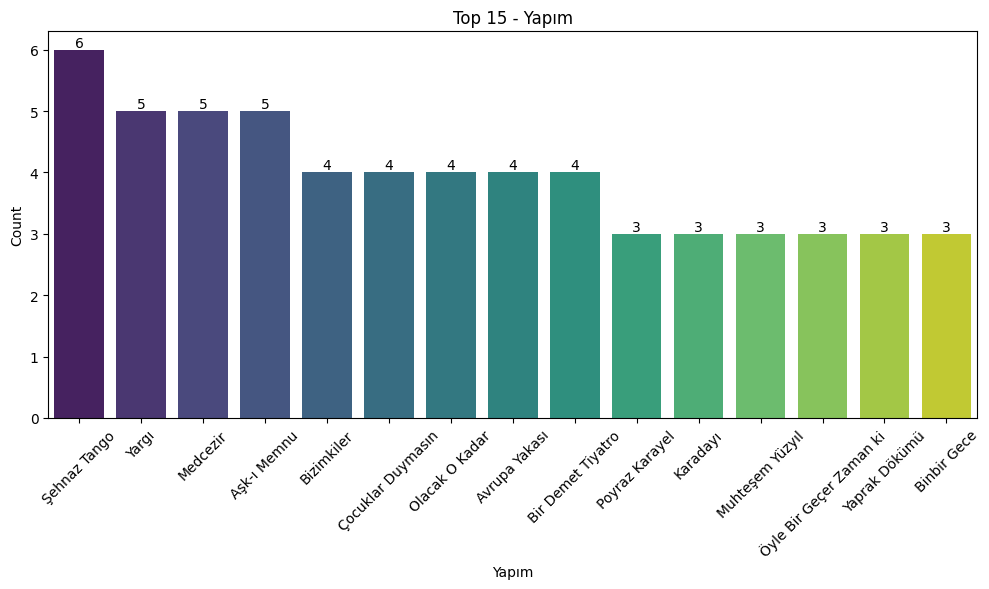

In [118]:
plot_top_15(pantene_oyuncu_df, 'Yapım')

# En Çok Altın Kelebek Ödülünü Alan Yönetmenler

In [23]:
pantene = urlopen('https://tr.wikipedia.org/wiki/En_%C4%B0yi_Y%C3%B6netmen_Alt%C4%B1n_Kelebek_%C3%96d%C3%BCl%C3%BC')
pantene_content = BeautifulSoup(pantene, 'html.parser')
logging.debug('Altın kelebek ödüllü yönetmenler wikipediadan çekildi.')
tables = pantene_content.find_all('table', {'class': 'wikitable'})

In [24]:
yonetmen_yillar = []
yonetmen_adlar = []
yonetmen_yapimlar = []

In [25]:
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        try:
            yonetmen_yil = row.find('th').get_text().strip('\n')
            if yonetmen_yil != 'Yıl':
                yonetmen_yillar.append(yonetmen_yil)
            cells = row.find_all('td')
            if len(cells) > 1:
                yonetmen_ad = cells[0].text.strip('\n')
                yonetmen_yapim = cells[1].text.strip('\n')
    
                yonetmen_adlar.append(yonetmen_ad)
                yonetmen_yapimlar.append(yonetmen_yapim)
        except:
            pass

In [26]:
pantene_yonetmen_df = pd.DataFrame({'Yıl': yonetmen_yillar, 'Yönetmen': yonetmen_adlar, 'Yapım': yonetmen_yapimlar})
logging.debug('Altın kelebek ödüllü yönetmenler veri seti oluşturuldu.')
pantene_yonetmen_df.head()

,Yıl,Yönetmen,Yapım
0,1999 (27.),Osman Sınav,Deli Yürek
1,2000 (28.),Nihat Durak,Yılan Hikayesi
2,2001 (29.),Osman Sınav,Deli Yürek
3,2012 (39.),Çağatay Tosun,Suskunlar
4,2013 (40.),Uluç Bayraktar ve Cem Karcı,Karadayı


In [29]:
pantene_yonetmen_df['Yıl'] = pantene_yonetmen_df['Yıl'].apply(remove_parentheses)

In [30]:
pantene_yonetmen_df = pantene_yonetmen_df.sort_values(by='Yıl').reset_index(drop=True)
pantene_yonetmen_df.head()

,Yıl,Yönetmen,Yapım
0,1999,Osman Sınav,Deli Yürek
1,2000,Nihat Durak,Yılan Hikayesi
2,2001,Osman Sınav,Deli Yürek
3,2012,Çağatay Tosun,Suskunlar
4,2013,Uluç Bayraktar ve Cem Karcı,Karadayı


In [31]:
pantene_yonetmen_df.to_csv('data/pantene_odullu_yonetmenler.csv')
logging.debug('Altın kelebek ödüllü yönetmenler veri seti kaydedildi.')

In [32]:
pantene_yonetmen_df = pd.read_csv('data/pantene_odullu_yonetmenler.csv', index_col=0)
pantene_yonetmen_df.head()

,Yıl,Yönetmen,Yapım
0,1999,Osman Sınav,Deli Yürek
1,2000,Nihat Durak,Yılan Hikayesi
2,2001,Osman Sınav,Deli Yürek
3,2012,Çağatay Tosun,Suskunlar
4,2013,Uluç Bayraktar ve Cem Karcı,Karadayı


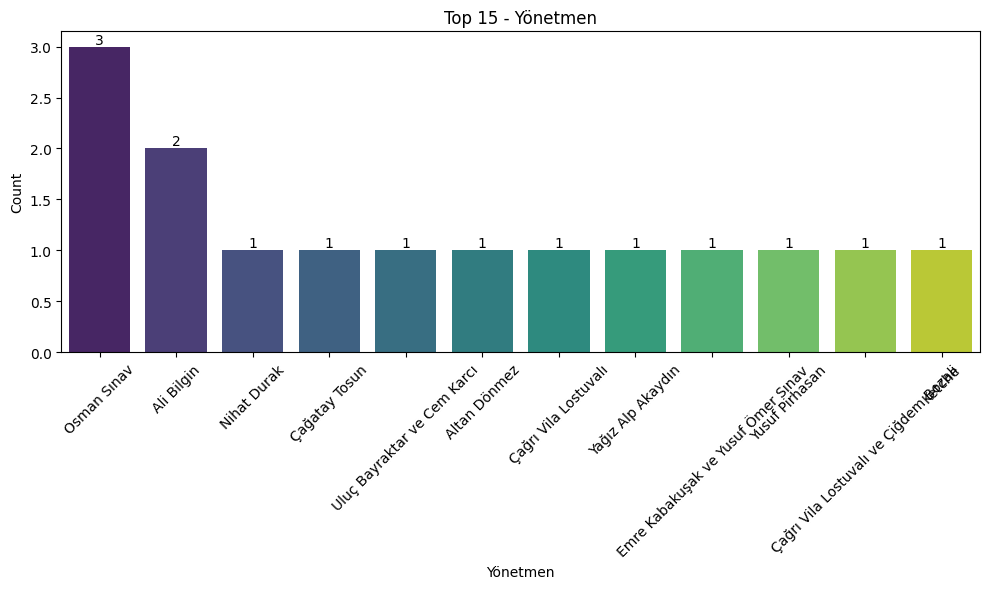

In [125]:
plot_top_15(pantene_yonetmen_df, 'Yönetmen')

# En Çok Altın Kelebek Ödülünü Alan Senaristler

In [126]:
pantene = urlopen('https://tr.wikipedia.org/wiki/En_%C4%B0yi_Senarist_Alt%C4%B1n_Kelebek_%C3%96d%C3%BCl%C3%BC')
pantene_content = BeautifulSoup(pantene, 'html.parser')
logging.debug('Altın kelebek ödüllü senaristler veri seti wikipediadan çekildi.')
tables = pantene_content.find_all('table', {'class': 'wikitable'})

In [127]:
senarist_yillar = []
senarist_adlar = []
senarist_yapimlar = []

In [128]:
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        try:
            senarist_yil = row.find('th').get_text().strip('\n')
            if senarist_yil != 'Yıl':
                senarist_yillar.append(senarist_yil)
            cells = row.find_all('td')
            if len(cells) > 1:
                senarist_ad = cells[0].text.strip('\n')
                senarist_yapim = cells[1].text.strip('\n')
    
                senarist_adlar.append(senarist_ad)
                senarist_yapimlar.append(senarist_yapim)
        except:
            pass

In [129]:
pantene_senarist_df = pd.DataFrame({'Yıl': senarist_yillar, 'Senarist': senarist_adlar, 'Yapım': senarist_yapimlar})
logging.debug('Altın kelebek ödüllü senaristler veri seti oluşturuldu.')
pantene_senarist_df.head()

,Yıl,Senarist,Yapım
0,1998 (26.),Kandemir Konduk,Mahallenin Muhtarları
1,1999 (27.),Kandemir Konduk,Mahallenin Muhtarları
2,2000 (28.),Tayfun Güneyer,Yılan Hikayesi
3,2001 (29.),Kandemir Konduk,Ana Kuzusu
4,2012 (39.),Gülse Birsel,Yalan Dünya


In [130]:
pantene_senarist_df['Yıl'] = pantene_senarist_df['Yıl'].apply(remove_parentheses)
logging.debug('Altın kelebek ödüllü senaristler veri seti yıl sütunu temizlendi.')

In [131]:
pantene_senarist_df = pantene_senarist_df.sort_values(by='Yıl').reset_index(drop=True)
logging.debug('Altın kelebek ödüllü senaristler veri seti yıla göre sıralandı.')
pantene_senarist_df.head()

,Yıl,Senarist,Yapım
0,1998,Kandemir Konduk,Mahallenin Muhtarları
1,1999,Kandemir Konduk,Mahallenin Muhtarları
2,2000,Tayfun Güneyer,Yılan Hikayesi
3,2001,Kandemir Konduk,Ana Kuzusu
4,2012,Gülse Birsel,Yalan Dünya


In [132]:
pantene_senarist_df.to_csv('data/pantene_odullu_senaristler.csv')
logging.debug('Altın kelebek ödüllü senaristler veri seti kaydedildi.')

In [133]:
pantene_senarist_df = pd.read_csv('data/pantene_odullu_senaristler.csv', index_col=0)
pantene_senarist_df.head()

,Yıl,Senarist,Yapım
0,1998,Kandemir Konduk,Mahallenin Muhtarları
1,1999,Kandemir Konduk,Mahallenin Muhtarları
2,2000,Tayfun Güneyer,Yılan Hikayesi
3,2001,Kandemir Konduk,Ana Kuzusu
4,2012,Gülse Birsel,Yalan Dünya


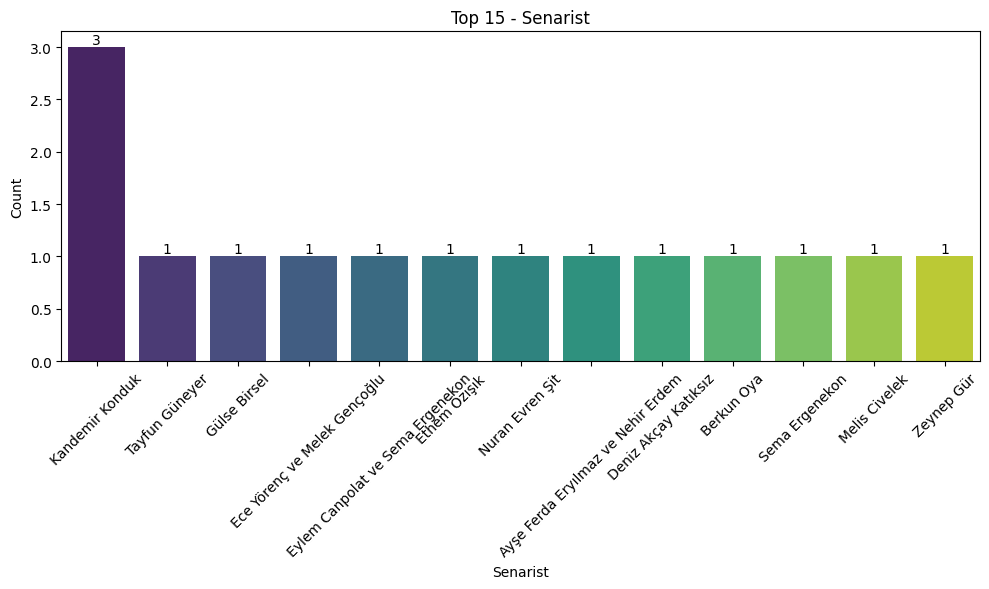

In [134]:
plot_top_15(pantene_senarist_df, 'Senarist')